In [2]:
import pandas as pd
import numpy as np
import scipy.sparse as ssp

from DSI_Capstone_Steemit.utils.utils import(
    load_data_and_description,
)
from sklearn.model_selection import train_test_split
import joblib
import os

data_directory = '../data/'
input_directory = os.path.join(data_directory,'networkx_votes')

posts_path = os.path.join(data_directory, 'posts_cleaned_features',
                          'posts_cleaned_features2.csv')

# data_desc = pd.read_csv(posts_path)

data_desc = joblib.load('../data/posts_cleaned_features/posts_cleaned_features2.pkl')



In [3]:
posts_raw_cleaned = data_desc

In [4]:
category = posts_raw_cleaned.ix[:, ['created', 'category']]
category = category.set_index('created')
category = pd.get_dummies(category, prefix='', prefix_sep='')
category.index = pd.DatetimeIndex(category.index)

# Number of days to group by
number_of_days = 3
category = category.resample(str(number_of_days) + 'D').sum()
x_array = range(category.shape[0] * number_of_days)
x_array = x_array[0::number_of_days]

for cat in category.columns:
    y = category[cat].values
    slopes = np.array([0] + list(np.diff(y[::1]) / np.diff(x_array[::1])))
    category[cat] = slopes


In [12]:
%matplotlib inline
import matplotlib.pylab as plt

In [14]:
time_series = posts_raw_cleaned.ix[:, ['created', 'category']]
time_series = time_series.set_index('created')
time_series = pd.get_dummies(time_series, prefix='', prefix_sep='')
time_series.index = pd.DatetimeIndex(time_series.index)

# Number of days to group by
number_of_days = 3
time_series = time_series.resample(str(number_of_days) + 'D').sum()



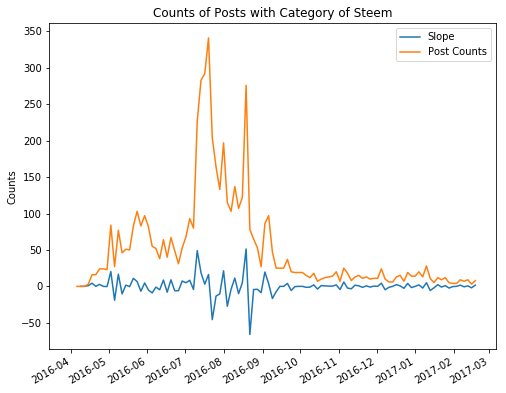

In [46]:
fig,ax = plt.subplots(1,1,figsize = (8,6))
ax.plot(category['steem'],label = 'Slope')
ax.plot(time_series['steem'],label = 'Post Counts')
ax.set_title('Counts of Posts with Category of Steem')
ax.set_ylabel('Counts')
labels  = [i.get_text() for i in ax.get_xticklabels()]
plt.xticks(rotation = 30,ha = 'right')
plt.legend()

In [37]:
a

[u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'']

In [34]:
b.get_text()

u''